# Computer graphics 1st lab Zaitsev Viktor 6202-010302D

## Imports

In [1]:
import numpy as np
from PIL import Image
from math import *

## Create Image from Matrix

1st version

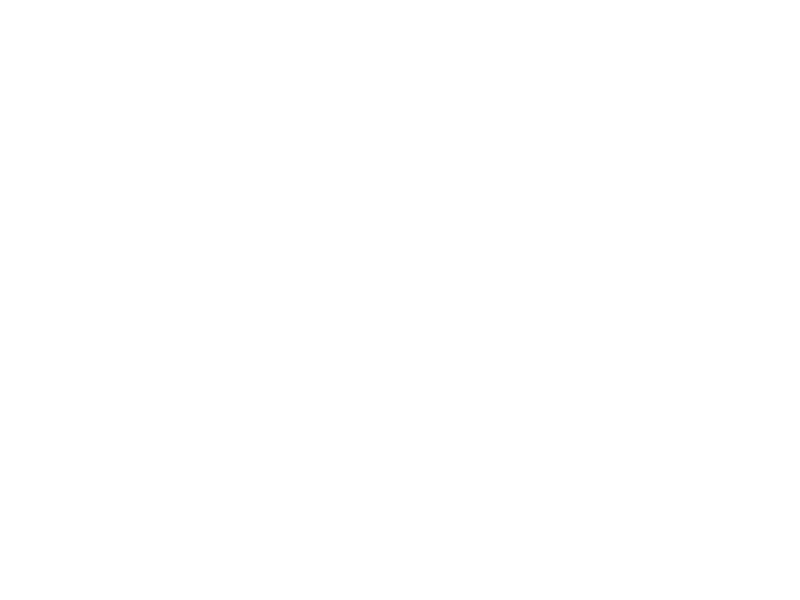

In [2]:
img_mat = np.zeros((600, 800), dtype=np.uint8)
img_mat[0:600, 0:800] = 255

img = Image.fromarray(img_mat, mode='L')
img

2nd version

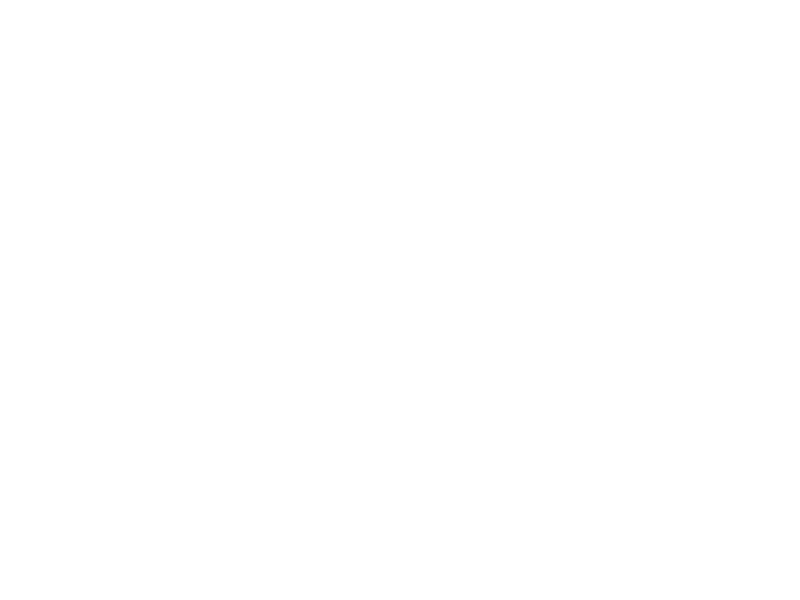

In [3]:
img_mat = np.zeros((600, 800, 3), dtype=np.uint8)
img_mat[0:600, 0:800] = 255

img = Image.fromarray(img_mat, mode='RGB')
img

3rd version

In [4]:
img_mat = np.zeros((600, 800, 3), dtype=np.uint8)
img_mat[0:600, 0:800] = 255

In [5]:
for i in range(600):
    for j in range(800):
        img_mat[i, j] = (i * j) % 256

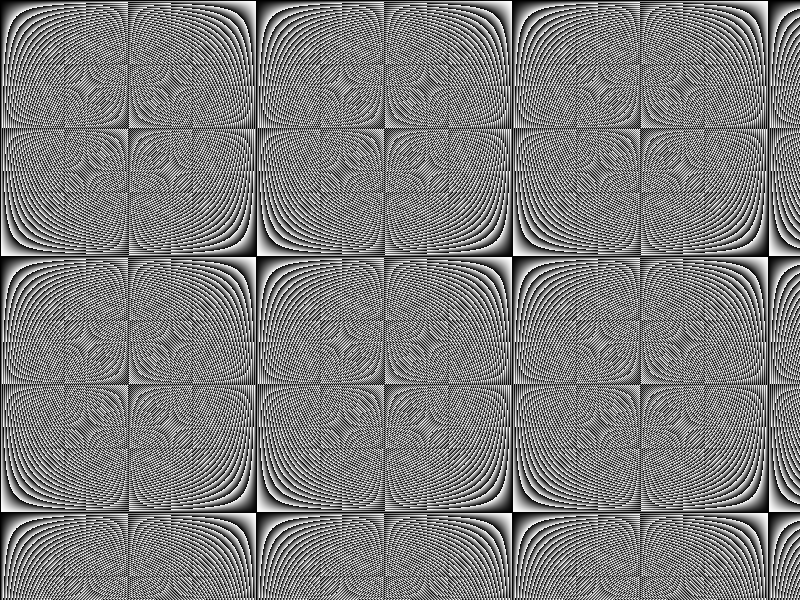

In [6]:
img = Image.fromarray(img_mat, mode='RGB')
img

## Draw star

## 1st method - Dotted line with manual step declaration

In [7]:
def dotted_line(image, x0, y0, x1, y1, count, color):
    step = 1.0 / count
    for t in np.arange(0, 1, step):
        x = round((1.0 - t) * x0 + t * x1)
        y = round((1.0 - t) * y0 + t * y1)
        image[y, x] = color

In [8]:
img_mat = np.zeros((200, 200, 3), dtype=np.uint8)
img_mat[0:600, 0:800] = 255

In [9]:
for i in range(13):
    x0 = 100
    y0 = 100
    x1 = 100 + 95 * cos(i * 2 * 22.0 / 7 / 13)
    y1 = 100 + 95 * sin(i * 2 * 22.0 / 7 / 13)
    dotted_line(img_mat, x0, y0, x1, y1, 25, 113)

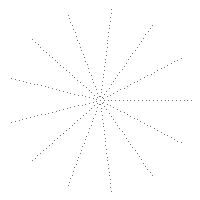

In [10]:
img = Image.fromarray(img_mat, mode='RGB')
img

Dotted line with auto step declaration

In [11]:
def dotted_line_v2(image, x0, y0, x1, y1, color):
    count = sqrt((x0 - x1) ** 2 + (y0 - y1) ** 2)
    step = 1.0 / count
    for t in np.arange(0, 1, step):
        x = round((1.0 - t) * x0 + t * x1)
        y = round((1.0 - t) * y0 + t * y1)
        image[y, x] = color

In [12]:
img_mat = np.zeros((200, 200, 3), dtype=np.uint8)
img_mat[0:600, 0:800] = 255

In [13]:
for i in range(13):
    x0 = 100
    y0 = 100
    x1 = 100 + 95 * cos(i * 2 * 22.0 / 7 / 13)
    y1 = 100 + 95 * sin(i * 2 * 22.0 / 7 / 13)
    dotted_line_v2(img_mat, x0, y0, x1, y1, 113)

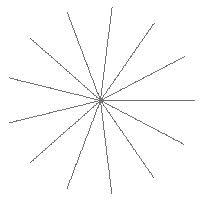

In [14]:
img = Image.fromarray(img_mat, mode='RGB')
img

## 2nd method - draw line with x loop

In [15]:
def x_loop_line(image, x0, y0, x1, y1, color):
    for x in range(x0, x1):
        t = (x - x0) / (x1 - x0)
        y = round((1.0 - t) * y0 + t * y1)
        image[y, x] = color

In [16]:
img_mat = np.zeros((200, 200, 3), dtype=np.uint8)
img_mat[0:600, 0:800] = 255

In [17]:
for i in range(13):
    x0 = 100
    y0 = 100
    x1 = int(100 + 95 * cos(i * 2 * 22.0 / 7 / 13))
    y1 = int(100 + 95 * sin(i * 2 * 22.0 / 7 / 13))
    x_loop_line(img_mat, x0, y0, x1, y1, 113)

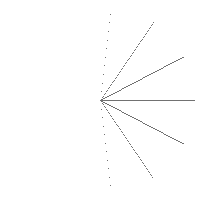

In [18]:
img = Image.fromarray(img_mat, mode='RGB')
img

fix #1 check start x points

In [19]:
def x_loop_line_v2(image, x0, y0, x1, y1, color):
    if (x0 > x1):
        x0, x1 = x1, x0
        y0, y1 = y1, y0
    for x in range(x0, x1):
        t = (x - x0) / (x1 - x0)
        y = round((1.0 - t) * y0 + t * y1)
        image[y, x] = color

In [20]:
img_mat = np.zeros((200, 200, 3), dtype=np.uint8)
img_mat[0:600, 0:800] = 255

In [21]:
for i in range(13):
    x0 = 100
    y0 = 100
    x1 = int(100 + 95 * cos(i * 2 * 22.0 / 7 / 13))
    y1 = int(100 + 95 * sin(i * 2 * 22.0 / 7 / 13))
    x_loop_line_v2(img_mat, x0, y0, x1, y1, 113)

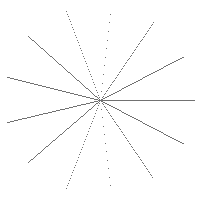

In [22]:
img = Image.fromarray(img_mat, mode='RGB')
img

fix #2 check x and y delta

In [23]:
def x_loop_line_v3(image, x0, y0, x1, y1, color):
    xchange = False
    if (abs(x0 - x1) < abs(y0 - y1)):
        x0, y0 = y0, x0
        x1, y1 = y1, x1
        xchange = True

    for x in range(x0, x1):
        t = (x - x0) / (x1 - x0)
        y = round((1.0 - t) * y0 + t * y1)

        if (xchange):
            image[x, y] = color
        else:
            image[y, x] = color


In [24]:
img_mat = np.zeros((200, 200, 3), dtype=np.uint8)
img_mat[0:600, 0:800] = 255

In [25]:
for i in range(13):
    x0 = 100
    y0 = 100
    x1 = int(100 + 95 * cos(i * 2 * 22.0 / 7 / 13))
    y1 = int(100 + 95 * sin(i * 2 * 22.0 / 7 / 13))
    x_loop_line_v3(img_mat, x0, y0, x1, y1, 113)

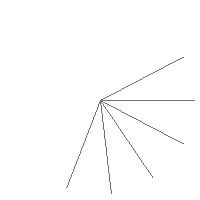

In [26]:
img = Image.fromarray(img_mat, mode='RGB')
img

Final version (merge)

In [27]:
def x_loop_line_final(image, x0, y0, x1, y1, color):
    xchange = False
    if (abs(x0 - x1) < abs(y0 - y1)):
        x0, y0 = y0, x0
        x1, y1 = y1, x1
        xchange = True

    if (x0 > x1):
        x0, x1 = x1, x0
        y0, y1 = y1, y0

    for x in range(x0, x1):
        t = (x - x0) / (x1 - x0)
        y = round((1.0 - t) * y0 + t * y1)

        if (xchange):
            image[x, y] = color
        else:
            image[y, x] = color


In [28]:
img_mat = np.zeros((200, 200, 3), dtype=np.uint8)
img_mat[0:600, 0:800] = 255

In [29]:
for i in range(13):
    x0 = 100
    y0 = 100
    x1 = int(100 + 95 * cos(i * 2 * 22.0 / 7 / 13))
    y1 = int(100 + 95 * sin(i * 2 * 22.0 / 7 / 13))
    x_loop_line_final(img_mat, x0, y0, x1, y1, 113)

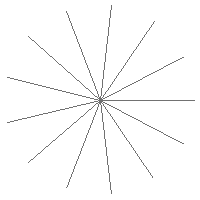

In [30]:
img = Image.fromarray(img_mat, mode='RGB')
img

# Bresenham's algorithm

loop x without y interpolation

In [31]:
def bresenham_v0(image, x0, y0, x1, y1, color):
    xchange = False
    if (abs(x0 - x1) < abs(y0 - y1)):
        x0, y0 = y0, x0
        x1, y1 = y1, x1
        xchange = True

    if (x0 > x1):
        x0, x1 = x1, x0
        y0, y1 = y1, y0

    y = y0
    dy = abs(y1 - y0) / (x1 - x0)
    derror = 0.0
    y_update = 1 if y1 > y0 else -1

    for x in range(x0, x1):
        if (xchange):
            image[x, y] = color
        else:
            image[y, x] = color
        derror += dy
        if (derror > 0.5):
            derror -= 1.0
            y += y_update

In [32]:
img_mat = np.zeros((200, 200, 3), dtype=np.uint8)
img_mat[0:600, 0:800] = 255

In [33]:
for i in range(13):
    x0 = 100
    y0 = 100
    x1 = int(100 + 95 * cos(i * 2 * 22.0 / 7 / 13))
    y1 = int(100 + 95 * sin(i * 2 * 22.0 / 7 / 13))
    bresenham_v0(img_mat, x0, y0, x1, y1, 113)

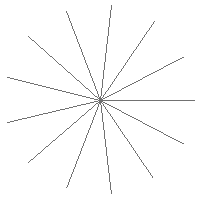

In [34]:
img = Image.fromarray(img_mat, mode='RGB')
img

idk

In [35]:
def bresenham_v05(image, x0, y0, x1, y1, color):
    xchange = False
    if (abs(x0 - x1) < abs(y0 - y1)):
        x0, y0 = y0, x0
        x1, y1 = y1, x1
        xchange = True

    if (x0 > x1):
        x0, x1 = x1, x0
        y0, y1 = y1, y0

    y = y0
    dy = 2.0 * (x1 - x0) * abs(y1 - y0) / (x1 - x0)
    derror = 0.0
    y_update = 1 if y1 > y0 else -1

    for x in range(x0, x1):
        if (xchange):
            image[x, y] = color
        else:
            image[y, x] = color
        derror += dy
        if (derror > 2.0 * (x1 - x0) * 0.5):
            derror -= 2.0 * (x1 - x0) * 1.0
            y += y_update

In [36]:
img_mat = np.zeros((200, 200, 3), dtype=np.uint8)
img_mat[0:600, 0:800] = 255

In [37]:
for i in range(13):
    x0 = 100
    y0 = 100
    x1 = int(100 + 95 * cos(i * 2 * 22.0 / 7 / 13))
    y1 = int(100 + 95 * sin(i * 2 * 22.0 / 7 / 13))
    bresenham_v05(img_mat, x0, y0, x1, y1, 113)

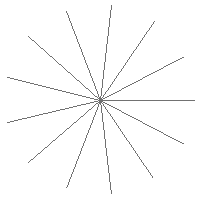

In [38]:
img = Image.fromarray(img_mat, mode='RGB')
img

## Final

In [39]:
def bresenham(image, x0, y0, x1, y1, color):
    xchange = False
    if (abs(x0 - x1) < abs(y0 - y1)):
        x0, y0 = y0, x0
        x1, y1 = y1, x1
        xchange = True

    if (x0 > x1):
        x0, x1 = x1, x0
        y0, y1 = y1, y0

    y = y0
    dy = 2*abs(y1 - y0)
    derror = 0.0
    y_update = 1 if y1 > y0 else -1


    for x in range (x0, x1):
        if (xchange):
            image[x, y] = color
        else:
            image[y, x] = color
        derror += dy
        if (derror > (x1 - x0)):
            derror -= 2*(x1 - x0)
            y += y_update


In [40]:
img_mat = np.zeros((200, 200, 3), dtype=np.uint8)
img_mat[0:600, 0:800] = 255

In [41]:
for i in range(13):
    x0 = 100
    y0 = 100
    x1 = int(100 + 95 * cos(i * 2 * 22.0/7 / 13))
    y1 = int(100 + 95 * sin(i * 2 * 22.0/7 / 13))
    bresenham(img_mat, x0, y0, x1, y1, 113)

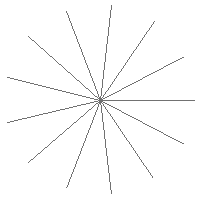

In [42]:
img = Image.fromarray(img_mat, mode = 'RGB')
img

# Rabbit drawing

parser

In [43]:
def parse_obj(filename):
    vertices = []
    faces = []

    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('v '):
                _, x, y, z = line.split()
                vertices.append([float(x), float(y)])
            elif line.startswith('f '):
                face = [int(vert.split('/')[0]) - 1 for vert in line.split()[1:]]
                faces.append(face)

        return np.array(vertices), faces

color

In [44]:
def get_line_color(y, height):
    if y < height/3:
        return (255, 255, 255)  # Белый
    elif y < 2*height/3:
        return (0, 0, 255)      # Синий
    else:
        return (255, 0, 0)      # Красный

normalization

In [45]:
def normalize_coords(vertices, width, height, margin=50):
    min_x, min_y = vertices.min(axis=0)
    max_x, max_y = vertices.max(axis=0)

    scale = min((width - 2*margin) / (max_x - min_x),
                (height - 2*margin) / (max_y - min_y))

    vertices = vertices * scale
    vertices[:, 0] += (width - scale*(max_x + min_x)) / 2
    vertices[:, 1] += (height - scale*(max_y + min_y)) / 2

    return vertices

visualization

In [46]:
def display_obj(filename, width=1600, height=1200):
    vertices, faces = parse_obj(filename)
    vertices = normalize_coords(vertices, width, height)

    image = np.zeros((height, width, 3), dtype=np.uint8)

    for face in faces:
        for i in range(len(face)):
            start = vertices[face[i]]
            end = vertices[face[(i + 1) % len(face)]]

            x0, y0 = int(start[0]), int(start[1])
            x1, y1 = int(end[0]), int(end[1])

            y_avg = (y0 + y1) / 2
            color = get_line_color(y_avg, height)

            bresenham(image, x0, y0, x1, y1, color)

    return Image.fromarray(image)

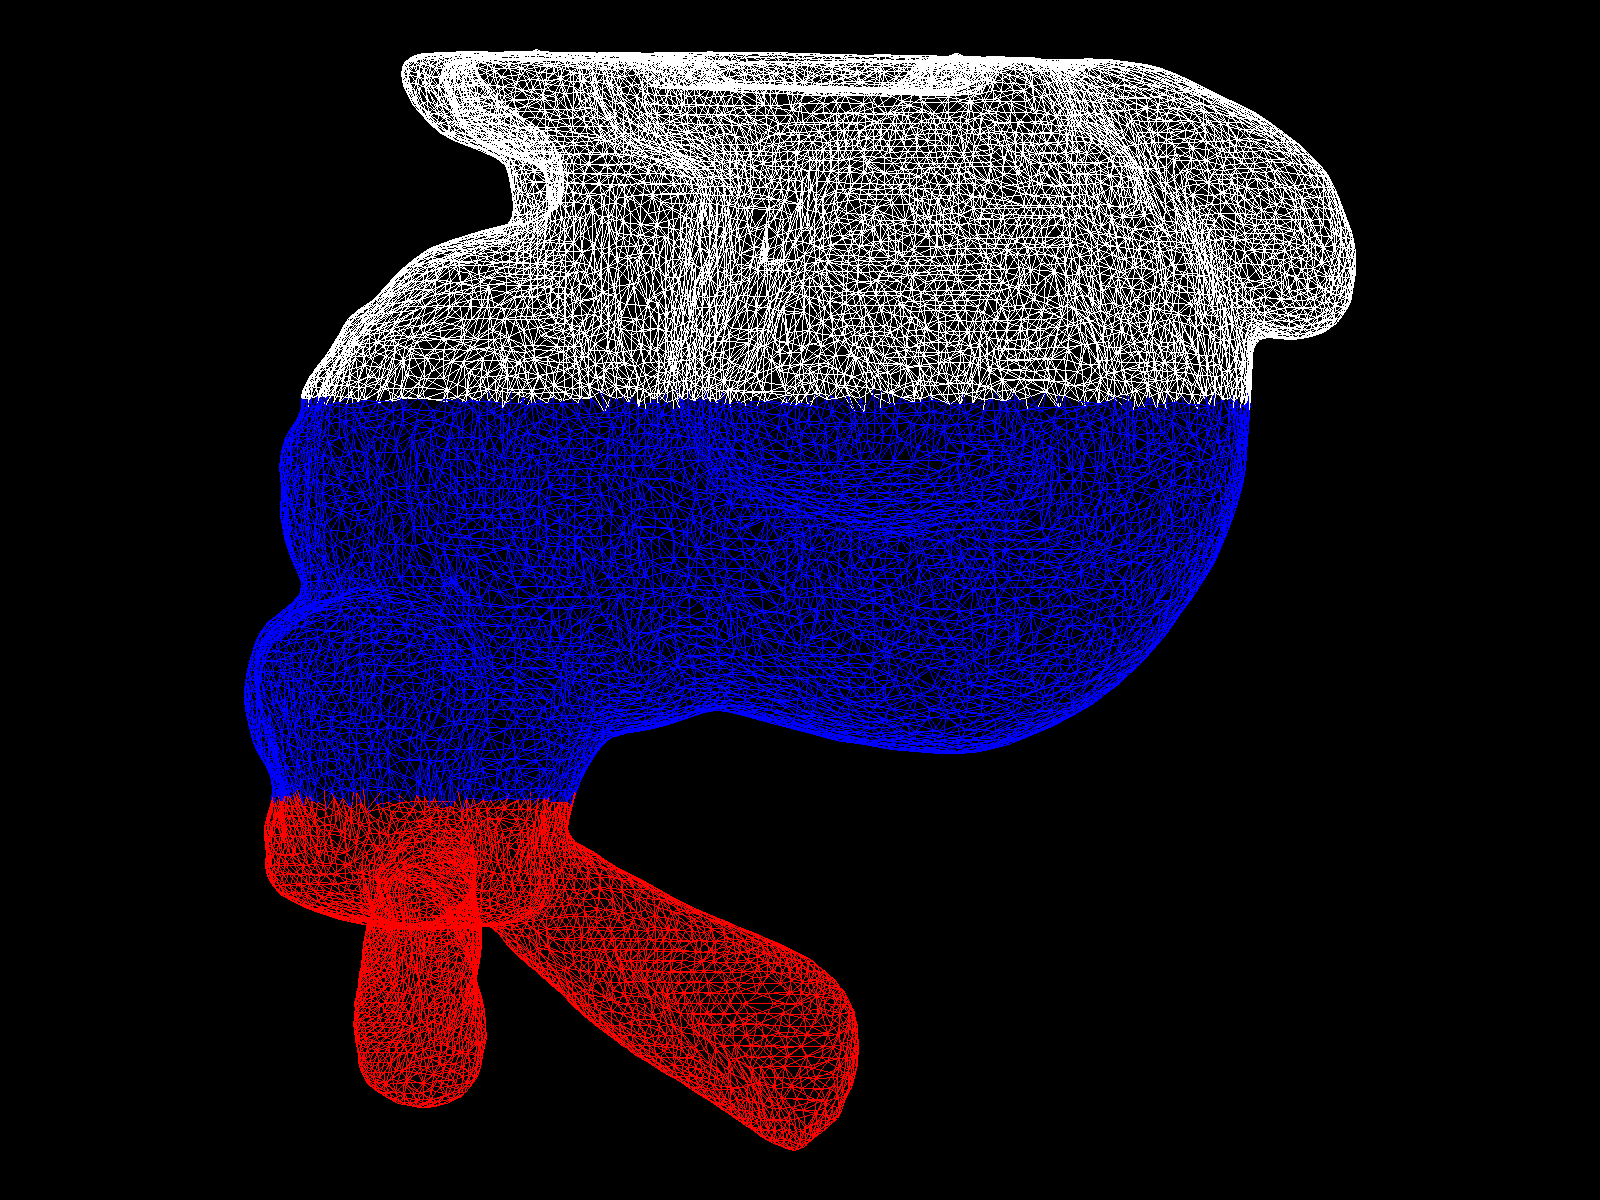

In [47]:
img = display_obj("../model.obj")
img